In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score

In [2]:
with open("..\data\stage2\calibset1.txt") as fl:
    calib1=fl.read().split('\n\n')

with open("..\data\stage2\calibset2.txt") as fl:
    calib2=fl.read().split('\n\n')

with open("..\data\stage2\dataset1.txt") as fl:
    data1=fl.read().split('\n\n')

with open("..\data\stage2\dataset2.txt") as fl:
    data2=fl.read().split('\n\n')

calib1_ex=np.array([tuple(map(int,line.split('\n')[0].split(','))) for line in calib1])
calib1_rd=np.array([tuple(map(int,line.split('\n')[1].split(','))) for line in calib1])

calib2_ex=np.array([tuple(map(int,line.split('\n')[0].split(','))) for line in calib2])
calib2_rd=np.array([tuple(map(int,line.split('\n')[1].split(','))) for line in calib2])

data1_ex=np.array([tuple(map(int,line.split('\n')[0].split(','))) for line in data1])
data1_rd=np.array([tuple(map(int,line.split('\n')[1].split(','))) for line in data1])

data2_ex=np.array([tuple(map(int,line.split('\n')[0].split(','))) for line in data2])
data2_rd=np.array([tuple(map(int,line.split('\n')[1].split(','))) for line in data2])

print(calib1_ex)
print(calib1_rd)

[[255   0   0]
 [  0 255   0]
 [  0   0 255]
 [  0   0   0]
 [255 255 255]]
[[660 131 125]
 [397 236 126]
 [303 161 214]
 [306 104  98]
 [663 337 306]]


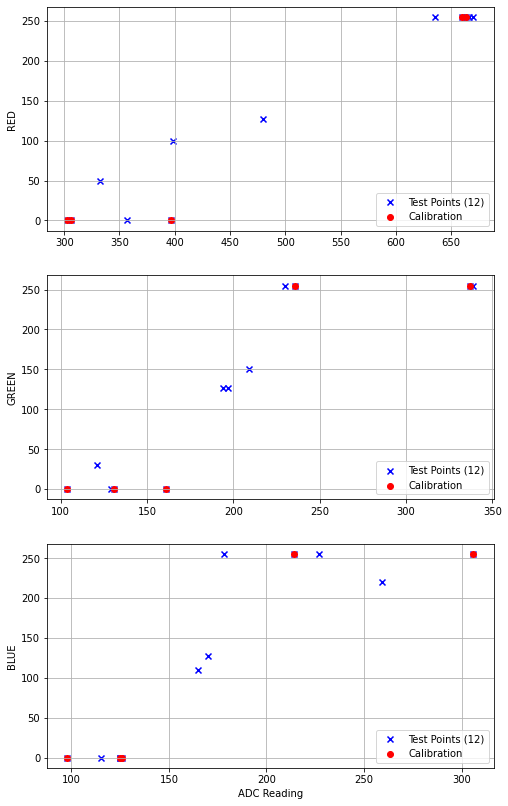

In [9]:
# Regression Method

i=0
fig,ax=plt.subplots(3,1,figsize=(8,14))

axis_str_x=["Reading"]
axis_str_y=["RED","GREEN","BLUE"]

calib1_y={}
calib1_x={}

data1_y={}
data1_x={}

data2_y={}
data2_x={}

for i in range(3):
    calib1_y[i]=np.split(calib1_ex,3,1)[i].reshape(5)
    calib1_x[i]=np.split(calib1_rd,3,1)[i].reshape(5)

    data1_y[i]=np.split(data1_ex,3,1)[i].reshape(12)
    data1_x[i]=np.split(data1_rd,3,1)[i].reshape(12)

    data2_y[i]=np.split(data2_ex,3,1)[i].reshape(36)
    data2_x[i]=np.split(data2_rd,3,1)[i].reshape(36)

    # ax[i].scatter(data2_x[i],data2_y[i],c="green")
    ax[i].scatter(data1_x[i],data1_y[i],c="blue",label="Test Points (12)",marker='x')
    ax[i].scatter(calib1_x[i],calib1_y[i],c="red",label="Calibration")
    ax[i].set_ylabel(axis_str_y[i])
    ax[i].grid()
    ax[i].legend(loc=4)
    
ax[2].set_xlabel("ADC Reading")
plt.show()
fig.savefig("Graphs/fig1.png")


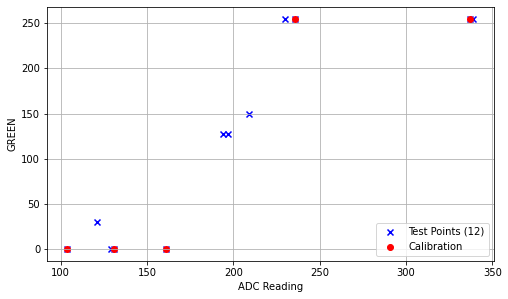

In [13]:
fig,ax2=plt.subplots(1,1,figsize=(8,14/3))

i=1
ax2.scatter(data1_x[i],data1_y[i],c="blue",label="Test Points (12)",marker='x')
# ax2.scatter(data2_x[i],data2_y[i],c="green",label="Test Points (36)",marker='+')

ax2.scatter(calib1_x[i],calib1_y[i],c="red",label="Calibration")
ax2.set_ylabel(axis_str_y[i])
ax2.grid()
ax2.legend(loc=4)
    
ax2.set_xlabel("ADC Reading")
plt.show()
fig.savefig("Graphs/fig1.1.png")

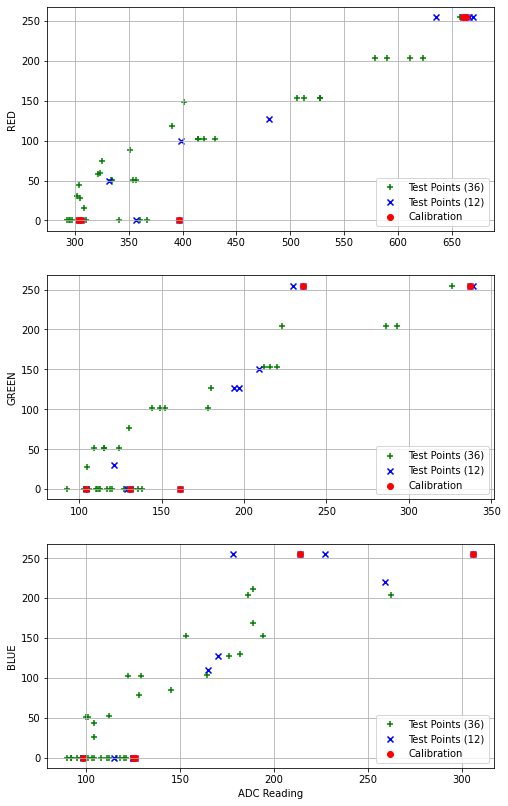

In [12]:
#Multiple Regresion
fig,ax=plt.subplots(3,1,figsize=(8,14))
for i in range(3):
   
    ax[i].scatter(data2_x[i],data2_y[i],c="green",label="Test Points (36)",marker='+')
    ax[i].scatter(data1_x[i],data1_y[i],c="blue",label="Test Points (12)",marker='x')
    ax[i].scatter(calib1_x[i],calib1_y[i],c="red",label="Calibration")
    ax[i].set_ylabel(axis_str_y[i])
    ax[i].grid()
    ax[i].legend(loc=4)
    
ax[2].set_xlabel("ADC Reading")
plt.show()
fig.savefig("Graphs/fig2.png")

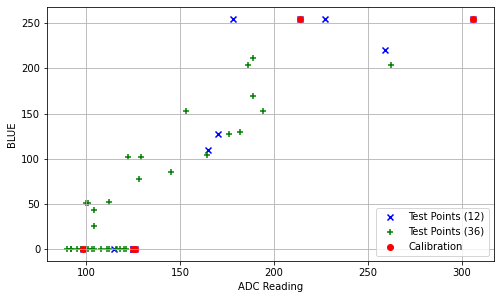

In [11]:
fig,ax2=plt.subplots(1,1,figsize=(8,14/3))

i=2
ax2.scatter(data1_x[i],data1_y[i],c="blue",label="Test Points (12)",marker='x')
ax2.scatter(data2_x[i],data2_y[i],c="green",label="Test Points (36)",marker='+')

ax2.scatter(calib1_x[i],calib1_y[i],c="red",label="Calibration")
ax2.set_ylabel(axis_str_y[i])
ax2.grid()
ax2.legend(loc=4)
    
ax2.set_xlabel("ADC Reading")
plt.show()
fig.savefig("Graphs/fig3.png")